In [81]:
import random
import numpy as np
import matplotlib.pyplot as plt 

# Defining the markov chain

### Initializing the matrix (pij = the probability to move from i to j in single step)

In [60]:
p00 = random.uniform(0,1) 
p10 = random.uniform(0,1)
P=np.array([[p00,1-p00],[p10,1-p10]])
print(P) # The matrix

[[0.19286546 0.80713454]
 [0.66891973 0.33108027]]


# Repeting multiplying until convergence to the stationary probability

In [61]:
eps =  0.0001
n=2
T_n_minus1 = P
T_n = np.matmul(P,P)
while (abs(T_n[0][0]-T_n_minus1[0][0]) > eps or abs(T_n[1][1]-T_n_minus1[1][1]) > eps):
    T_n_minus1 = T_n
    T_n = np.matmul(T_n_minus1,P)
    n+=1
print("Stationary probabilities:" ,T_n[0])
print("Steps to convergence:",n)

Stationary probabilities: [0.45319777 0.54680223]
Steps to convergence: 14


### Examing the proportion of station [0], in hope it will fit its stationary probability

In [75]:
station = 0
count = 0
for n in range(200):
    i = random.uniform(0,1)
    if (station==0):
        if (P[0][0]>i):
            count+=1
        else:
            station=1
    else: ###stat=1
        if(P[1][1]<i):
            station=0
            count+=1
print("Proportion of visting 0: ",count/200)

Proportion of visting 0:  0.475


#### An error of 0.022... not so good

### Taking 1000 simulations like this

In [90]:
arr=[]
for j in range(1000):
    station = 0
    count=0
    for n in range(200):
        i = random.uniform(0,1)
        if (station==0):
            if (P[0][0]>i):
                count+=1
            else:
                station=1
        else: ###stat=1
            if(P[1][1]<i):
                station=0
                count+=1
    arr.append(count/200)
print("Proportion of visting 0: ",sum(arr)/1000)

Proportion of visting 0:  0.45231499999999963


(array([  1.,  17.,  58., 175., 174., 244., 217.,  83.,  28.,   3.]),
 array([0.38 , 0.394, 0.408, 0.422, 0.436, 0.45 , 0.464, 0.478, 0.492,
        0.506, 0.52 ]),
 <BarContainer object of 10 artists>)

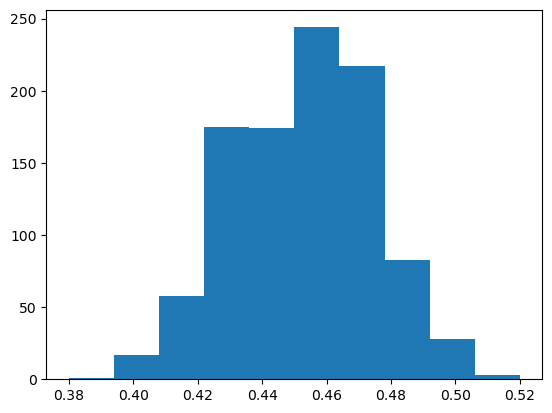

In [91]:
plt.hist(arr,10)

### Taking 5000 simulations like this

In [92]:
arr=[]
for j in range(5000):
    station = 0
    count=0
    for n in range(200):
        i = random.uniform(0,1)
        if (station==0):
            if (P[0][0]>i):
                count+=1
            else:
                station=1
        else: ###stat=1
            if(P[1][1]<i):
                station=0
                count+=1
    arr.append(count/200)
print("Proportion of visting 0: ",sum(arr)/5000)

Proportion of visting 0:  0.4519509999999972


(array([  28.,  127.,  450., 1019., 1407., 1133.,  604.,  190.,   39.,
           3.]),
 array([0.38  , 0.3955, 0.411 , 0.4265, 0.442 , 0.4575, 0.473 , 0.4885,
        0.504 , 0.5195, 0.535 ]),
 <BarContainer object of 10 artists>)

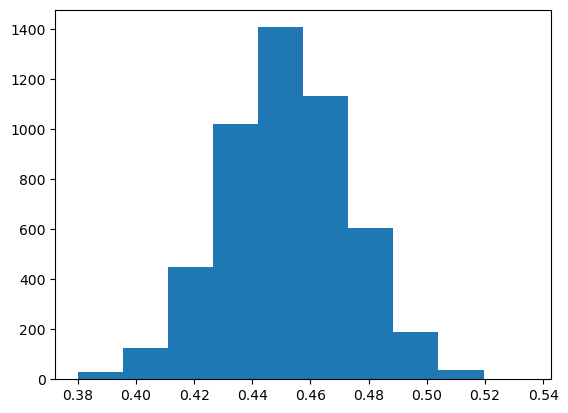

In [93]:
plt.hist(arr,10)

### Actually we got a proof for CLT (Central limit theorem)